/var/folders/mf/3kxvjfxd3zxf55f4k7vp56gc0000gn/T/ipykernel_8126/211358919.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='*', color='r', s=500, label='Max Sharpe Ratio')
/var/folders/mf/3kxvjfxd3zxf55f4k7vp56gc0000gn/T/ipykernel_8126/211358919.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_vol_port[1], min_vol_port[0], marker='*', color='b', s=500, label='Min Volatility')


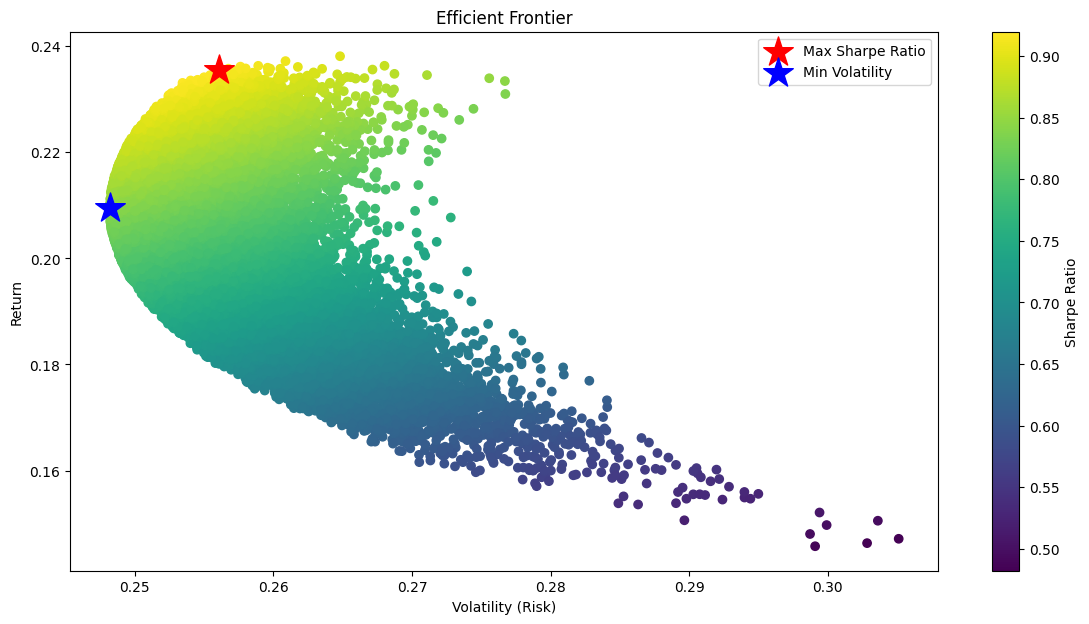

Optimal Weights: [0.04805147 0.24632954 0.38321283 0.04032331 0.28208285]
Expected Return: 0.2355841956966167
Expected Volatility: 0.25604853041196435
Sharpe Ratio: 0.9198576352602694


/var/folders/mf/3kxvjfxd3zxf55f4k7vp56gc0000gn/T/ipykernel_8126/211358919.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  optimal_weights = weights_record[int(max_sharpe_port[3])]
/var/folders/mf/3kxvjfxd3zxf55f4k7vp56gc0000gn/T/ipykernel_8126/211358919.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Expected Return: {max_sharpe_port[0]}")
/var/folders/mf/3kxvjfxd3zxf55f4k7vp56gc0000gn/T/ipykernel_8126/211358919.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Load the data
file_path = '/Users/haoguannan/Downloads/Portfolio_df.csv'
portfolio_df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime
portfolio_df['Date'] = pd.to_datetime(portfolio_df['Date'])

# Calculate daily returns using the natural logarithm
daily_return_df = pd.DataFrame()
daily_return_df['Date'] = portfolio_df['Date']
for column in portfolio_df.columns[1:]:  # Skip the 'Date' column
    daily_return_df[column] = np.log(portfolio_df[column] / portfolio_df[column].shift(1))

# Set the first day's return to 0
daily_return_df.iloc[0, 1:] = 0

# Exclude the 'Date' column for mean returns and covariance matrix calculation
mean_returns = daily_return_df.iloc[1:, 1:].mean() * 252  # Annualize the mean returns
cov_matrix = daily_return_df.iloc[1:, 1:].cov() * 252  # Annualize the covariance matrix

# Define the average risk-free rate (replace with actual calculated value if necessary)
risk_free_rate = 0.000056  # This is defined in another file

# Monte Carlo Simulation to find the optimal portfolio
num_portfolios = 50000
results = np.zeros((4, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.uniform(0.10, 1, len(mean_returns))
    weights /= np.sum(weights)
    weights_record.append(weights)
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = sharpe_ratio
    results[3,i] = i

# Convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T, columns=['Return', 'Standard Deviation', 'Sharpe Ratio', 'Index'])

# Locate the portfolio with the highest Sharpe ratio
max_sharpe_port = results_frame.loc[results_frame['Sharpe Ratio'].idxmax()]

# Locate the portfolio with the minimum standard deviation
min_vol_port = results_frame.loc[results_frame['Standard Deviation'].idxmin()]

# Plot the efficient frontier
plt.figure(figsize=(14, 7))
plt.scatter(results_frame['Standard Deviation'], results_frame['Return'], c=results_frame['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='*', color='r', s=500, label='Max Sharpe Ratio')
plt.scatter(min_vol_port[1], min_vol_port[0], marker='*', color='b', s=500, label='Min Volatility')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.legend()
plt.show()

# Print the details of the optimal portfolio
optimal_weights = weights_record[int(max_sharpe_port[3])]
print(f"Optimal Weights: {optimal_weights}")
print(f"Expected Return: {max_sharpe_port[0]}")
print(f"Expected Volatility: {max_sharpe_port[1]}")
print(f"Sharpe Ratio: {max_sharpe_port[2]}")


/var/folders/mf/3kxvjfxd3zxf55f4k7vp56gc0000gn/T/ipykernel_8126/3765866696.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='o', color='r', s=100, label='Max Sharpe Ratio')  # Use a round marker
/var/folders/mf/3kxvjfxd3zxf55f4k7vp56gc0000gn/T/ipykernel_8126/3765866696.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_vol_port[1], min_vol_port[0], marker='o', color='b', s=100, label='Min Volatility')  # Use a round marker


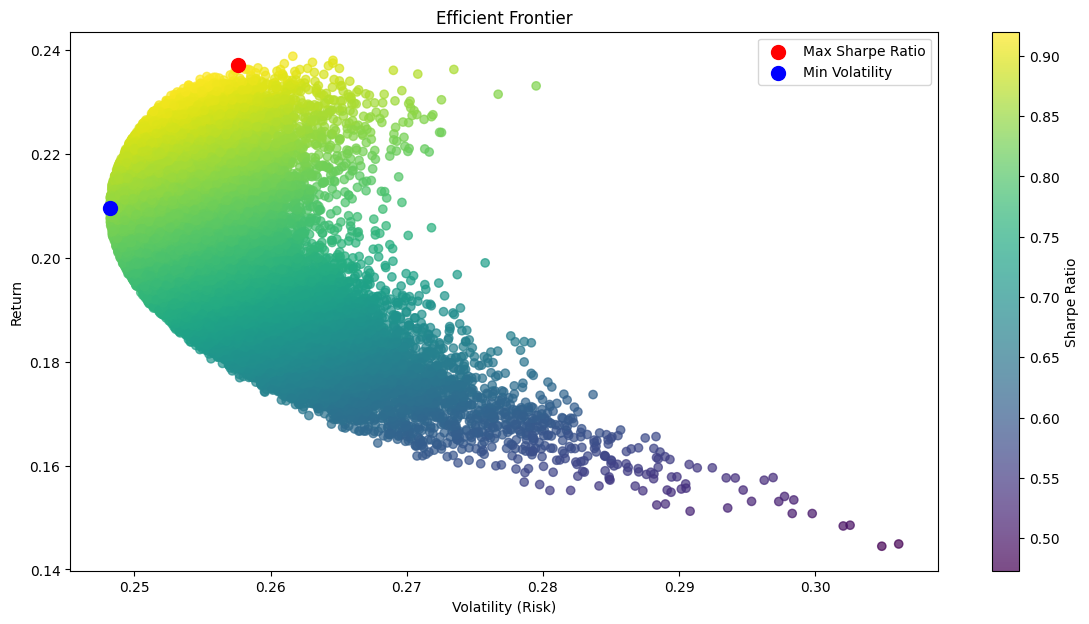

Optimal Weights: [0.04136391 0.24590381 0.35884355 0.03746417 0.31642456]
Expected Return: 0.23702942919495362
Expected Volatility: 0.25758421032442075
Sharpe Ratio: 0.9199842991016088


/var/folders/mf/3kxvjfxd3zxf55f4k7vp56gc0000gn/T/ipykernel_8126/3765866696.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  optimal_weights = weights_record[int(max_sharpe_port[3])]
/var/folders/mf/3kxvjfxd3zxf55f4k7vp56gc0000gn/T/ipykernel_8126/3765866696.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Expected Return: {max_sharpe_port[0]}")
/var/folders/mf/3kxvjfxd3zxf55f4k7vp56gc0000gn/T/ipykernel_8126/3765866696.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Load the data
file_path = '/Users/haoguannan/Downloads/Portfolio_df.csv'
portfolio_df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime
portfolio_df['Date'] = pd.to_datetime(portfolio_df['Date'])

# Calculate daily returns using the natural logarithm
daily_return_df = pd.DataFrame()
daily_return_df['Date'] = portfolio_df['Date']
for column in portfolio_df.columns[1:]:  # Skip the 'Date' column
    daily_return_df[column] = np.log(portfolio_df[column] / portfolio_df[column].shift(1))

# Set the first day's return to 0
daily_return_df.iloc[0, 1:] = 0

# Exclude the 'Date' column for mean returns and covariance matrix calculation
mean_returns = daily_return_df.iloc[1:, 1:].mean() * 252  # Annualize the mean returns
cov_matrix = daily_return_df.iloc[1:, 1:].cov() * 252  # Annualize the covariance matrix

# Define the average risk-free rate (replace with actual calculated value if necessary)
risk_free_rate = 0.000056  # This is defined in another file

# Monte Carlo Simulation to find the optimal portfolio
num_portfolios = 50000
results = np.zeros((4, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.uniform(0.10, 1, len(mean_returns))
    weights /= np.sum(weights)
    weights_record.append(weights)
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = sharpe_ratio
    results[3,i] = i

# Convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T, columns=['Return', 'Standard Deviation', 'Sharpe Ratio', 'Index'])

# Locate the portfolio with the highest Sharpe ratio
max_sharpe_port = results_frame.loc[results_frame['Sharpe Ratio'].idxmax()]

# Locate the portfolio with the minimum standard deviation
min_vol_port = results_frame.loc[results_frame['Standard Deviation'].idxmin()]

# Plot the efficient frontier
plt.figure(figsize=(14, 7))
plt.scatter(results_frame['Standard Deviation'], results_frame['Return'], c=results_frame['Sharpe Ratio'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='o', color='r', s=100, label='Max Sharpe Ratio')  # Use a round marker
plt.scatter(min_vol_port[1], min_vol_port[0], marker='o', color='b', s=100, label='Min Volatility')  # Use a round marker
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.legend()
plt.show()

# Print the details of the optimal portfolio
optimal_weights = weights_record[int(max_sharpe_port[3])]
print(f"Optimal Weights: {optimal_weights}")
print(f"Expected Return: {max_sharpe_port[0]}")
print(f"Expected Volatility: {max_sharpe_port[1]}")
print(f"Sharpe Ratio: {max_sharpe_port[2]}")
